In [20]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv("/Users/deepakshinde/Downloads/fraudTrain.csv")
test=pd.read_csv("//Users/deepakshinde/Downloads/fraudTrain.csv")

In [27]:
train.head(10)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,trans_num,merch_long,is_fraud,year,month,day,hour,minute
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,3495,370,56438,-82.048315,False,2019,1,1,0,0
1,630423337322,241,4,107.23,309,157,0,435,612,47,149,428,159395,-118.186462,False,2019,1,1,0,0
2,38859492057661,390,0,220.11,115,381,1,602,468,13,4154,307,818703,-112.154481,False,2019,1,1,0,0
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,1939,328,544575,-112.561071,False,2019,1,1,0,1
4,375534208663984,297,9,41.96,336,149,1,418,216,45,99,116,831111,-78.632459,False,2019,1,1,0,3
5,4767265376804500,607,2,94.63,162,82,0,471,223,38,2158,479,124696,-76.152667,False,2019,1,1,0,4
6,30074693890476,534,3,44.54,199,360,0,882,351,16,2691,29,667812,-100.153370,False,2019,1,1,0,4
7,6011360759745864,107,2,71.65,311,467,1,224,236,45,6018,127,552855,-78.540296,False,2019,1,1,0,5
8,4922710831011201,250,9,4.27,144,70,0,685,474,38,1472,375,1277329,-79.958146,False,2019,1,1,0,5
9,2720830304681674,563,4,198.39,239,3,0,213,149,42,151785,329,301740,-87.485381,False,2019,1,1,0,6


In [28]:
train.tail(5)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,trans_num,merch_long,is_fraud,year,month,day,hour,minute
1296670,30263540414123,499,0,15.56,121,332,1,154,330,44,258,215,344658,-111.690765,False,2020,6,21,12,12
1296671,6011149206456997,2,1,51.70,160,463,1,856,813,20,100,360,199896,-78.246528,False,2020,6,21,12,12
1296672,3514865930894695,599,1,105.93,74,67,1,158,346,32,899,308,366013,-105.130529,False,2020,6,21,12,12
1296673,2720012583106919,509,1,74.90,179,304,1,433,471,41,1126,485,1086299,-103.241160,False,2020,6,21,12,13
1296674,4292902571056973207,370,1,4.30,160,404,1,127,782,26,218,467,726622,-114.186110,False,2020,6,21,12,13


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  int64  
 2   category    1296675 non-null  int64  
 3   amt         1296675 non-null  float64
 4   first       1296675 non-null  int64  
 5   last        1296675 non-null  int64  
 6   gender      1296675 non-null  int64  
 7   street      1296675 non-null  int64  
 8   city        1296675 non-null  int64  
 9   state       1296675 non-null  int64  
 10  city_pop    1296675 non-null  int64  
 11  job         1296675 non-null  int64  
 12  trans_num   1296675 non-null  int64  
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  bool   
 15  year        1296675 non-null  int32  
 16  month       1296675 non-null  int32  
 17  day         1296675 non-null  int32  
 18  hour        1296675 no

In [30]:
train.isnull().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
city_pop      0
job           0
trans_num     0
merch_long    0
is_fraud      0
year          0
month         0
day           0
hour          0
minute        0
dtype: int64

In [32]:
train.shape

(1296675, 20)

In [3]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])
train['unix_time'] = pd.to_datetime(train['unix_time'], unit='s')


test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])
test['unix_time'] = pd.to_datetime(test['unix_time'], unit='s')

In [5]:
train['is_fraud'] = train['is_fraud'].astype(bool)
test['is_fraud'] = test['is_fraud'].astype(bool)

In [6]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute

test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute

# Drop the original 'trans_date_trans_time' column
train = train.drop(columns=['trans_date_trans_time'])
test = test.drop(columns=['trans_date_trans_time'])


In [7]:
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

In [8]:
train.drop(columns=('Unnamed: 0'),inplace=True)

In [9]:
test.drop(columns=('Unnamed: 0'),inplace=True)

In [10]:
categorical_cols

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [11]:
label_encoders = {}

In [12]:
for col in categorical_cols:
    le = LabelEncoder()

    # Fit on combined data (train + test) to maintain consistency
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_data)

    # Transform train and test sets
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

    # Store the encoder for future use
    label_encoders[col] = le


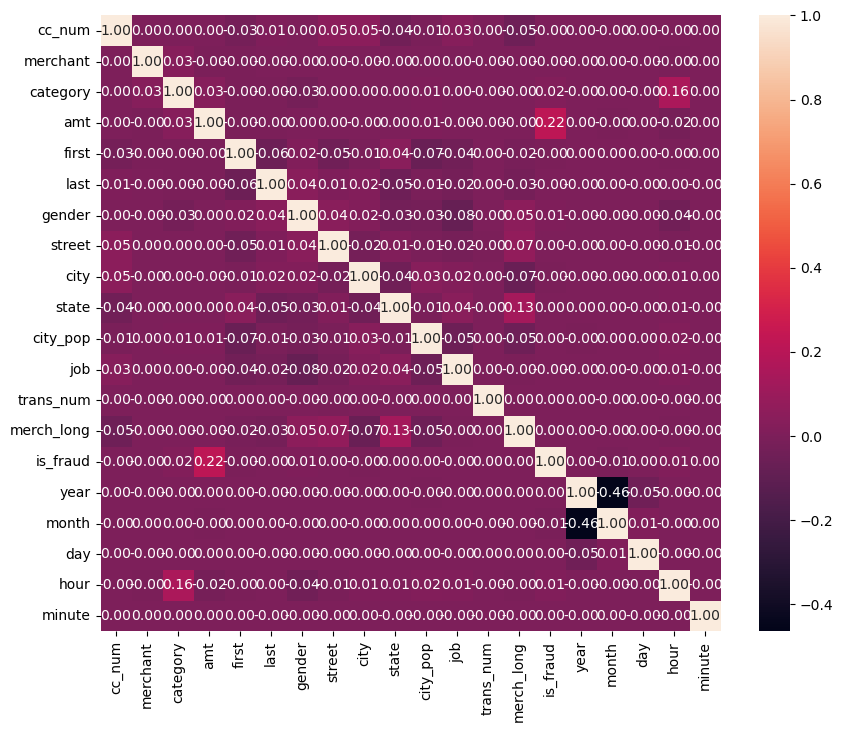

In [26]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [14]:
drop_columns = ['zip','unix_time','merch_lat','long','lat']


train = train.drop(columns=drop_columns)
test = test.drop(columns=drop_columns)

In [15]:
train.drop(columns=['dob'],inplace=True)
test.drop(columns=['dob'],inplace=True)

In [16]:

X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']
X_val = test.drop(columns=['is_fraud'])
y_val = test['is_fraud']

In [34]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
print("Logistic Regression:\n", classification_report(y_val, y_pred_logreg))

/Users/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   1289169
        True       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



/Users/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("Decision Tree:\n", classification_report(y_val, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1289169
        True       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest:\n", classification_report(y_val, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1289169
        True       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



In [37]:
accuracy = accuracy_score(y_val, y_pred_logreg)
print(f"Logistic regression Accuracy: {accuracy}")

accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy}")

Logistic regression Accuracy: 0.9942113482561166
Random Forest Accuracy: 0.9999984575934602


In [38]:
y_pred_logreg = logreg.predict(X_val)
print(y_pred_logreg)

[False False False ... False False False]
